In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
taiwan_real_estate = pd.read_csv('./taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


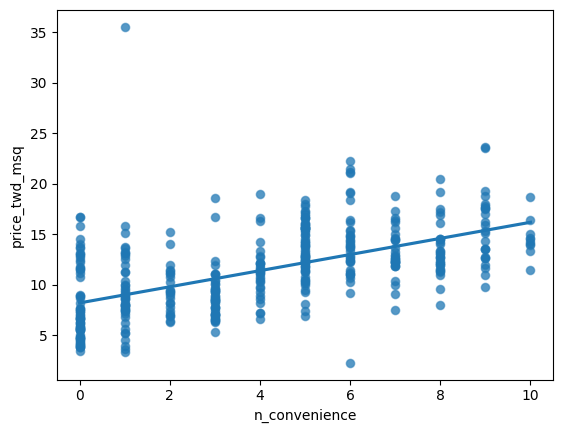

In [3]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate,
                alpha=0.5)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None,
            scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

In [4]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


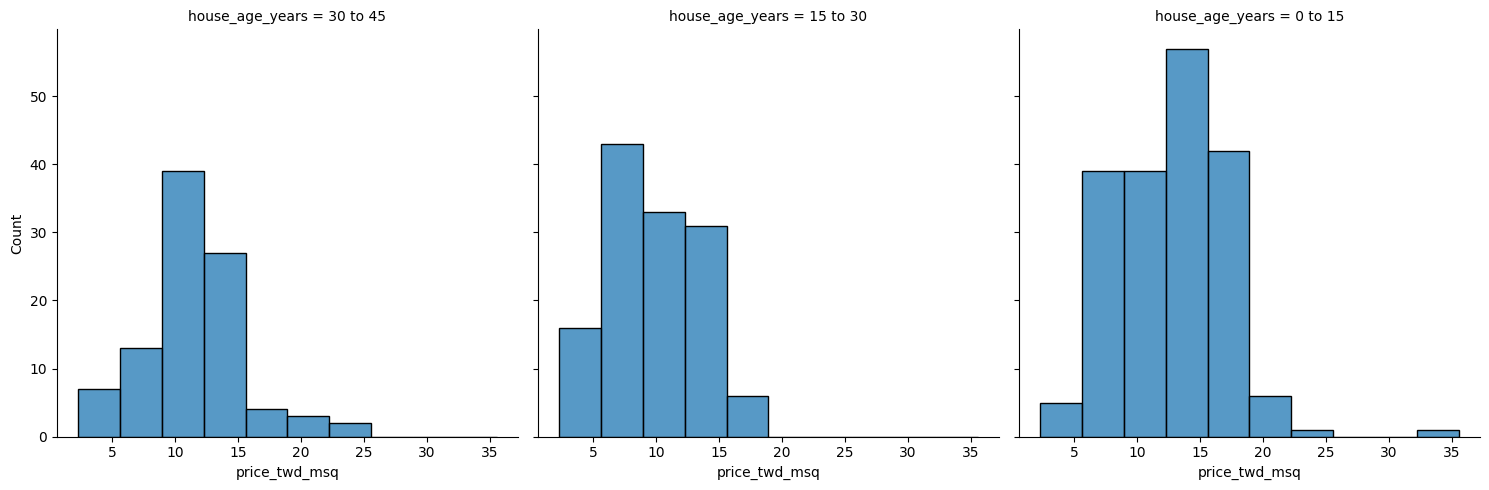

In [5]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
            x="price_twd_msq",
            col="house_age_years",
            bins=10)

# Show the plot
plt.show()

In [6]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

In [7]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)


Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [8]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years - 1", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64
